<p style="text-align: center;">
    <font size='5'><strong> DESAFIO DO KAGGLE- Apresentação </strong></font>
</p>

<font size='3'>
<strong>Tema</strong>: Prever se determinado adulto possui uma renda superior ou inferior a USD50k (modelo classificatório binário)<p>
<strong>Dados</strong>:  originários do "US Census Bureau", coletados em 1996 referentes ao ano de 1994. <p>
<strong>Link</strong>:  https://www.kaggle.com/uciml/adult-census-income <p>
</font>


A descrição dos dados está no site:

**age**: continuous.

**workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

**fnlwgt**: continuous.

**education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

**education-num**: continuous.

**marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

**occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

**relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

**race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

**sex**: Female, Male.

**capital-gain**: continuous.

**capital-loss**: continuous.

**hours-per-week**: continuous.

**native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



**1 - Importação de bibliotecas e carregar os dados de um DataFrame**

**2 - EDA**

**3 - Feature Selection**

**4 - Pre-processing**

**5 - Modelagem**

**6 - Hiperparâmetros**

**7 -  GridSearch e Cross Validation**

**8 - Aprofundamento da validação do modelo RandomForestClassifier usando KFold**

# 1 - Importação de bibliotecas e carregar os dados de um DataFrame

In [346]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [347]:
df_adult = pd.read_csv('adult.csv')
df_adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# 2 - Exploratory Data Analysis (EDA)

In [348]:
# Qual é a quantidade de linhas e colunas do dataset?
df_adult.shape

(48842, 15)

In [349]:
# Qual nome das colunas?
df_adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

Vamos analisar as features 'education' e 'educational-num', pois acredito que sejam a mesma coisa.

In [350]:
unique, counts = np.unique(df_adult['education'], return_counts=True)
print(unique)
print(sorted(counts))

['10th' '11th' '12th' '1st-4th' '5th-6th' '7th-8th' '9th' 'Assoc-acdm'
 'Assoc-voc' 'Bachelors' 'Doctorate' 'HS-grad' 'Masters' 'Preschool'
 'Prof-school' 'Some-college']
[83, 247, 509, 594, 657, 756, 834, 955, 1389, 1601, 1812, 2061, 2657, 8025, 10878, 15784]


In [351]:
unique, counts = np.unique(df_adult['educational-num'], return_counts=True)
print(unique)
print(sorted(counts))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[83, 247, 509, 594, 657, 756, 834, 955, 1389, 1601, 1812, 2061, 2657, 8025, 10878, 15784]


Realmente ambas as features representam o grau de escolaridade, sendo um categórico e outro numérico. Ou seja, podemos deletar a categórica para não criar tantas features se for tratada. Mas antes, vamos analisar educational-num.

In [352]:
salarios = pd.pivot_table(df_adult, index = ['educational-num'], values = 'income', aggfunc = "count")
salarios

,income
educational-num,
1,83
2,247
3,509
4,955
5,756
6,1389
7,1812
8,657
9,15784


C:\Users\beatr\anaconda3\envs\aulas_dh\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='educational-num', ylabel='count'>

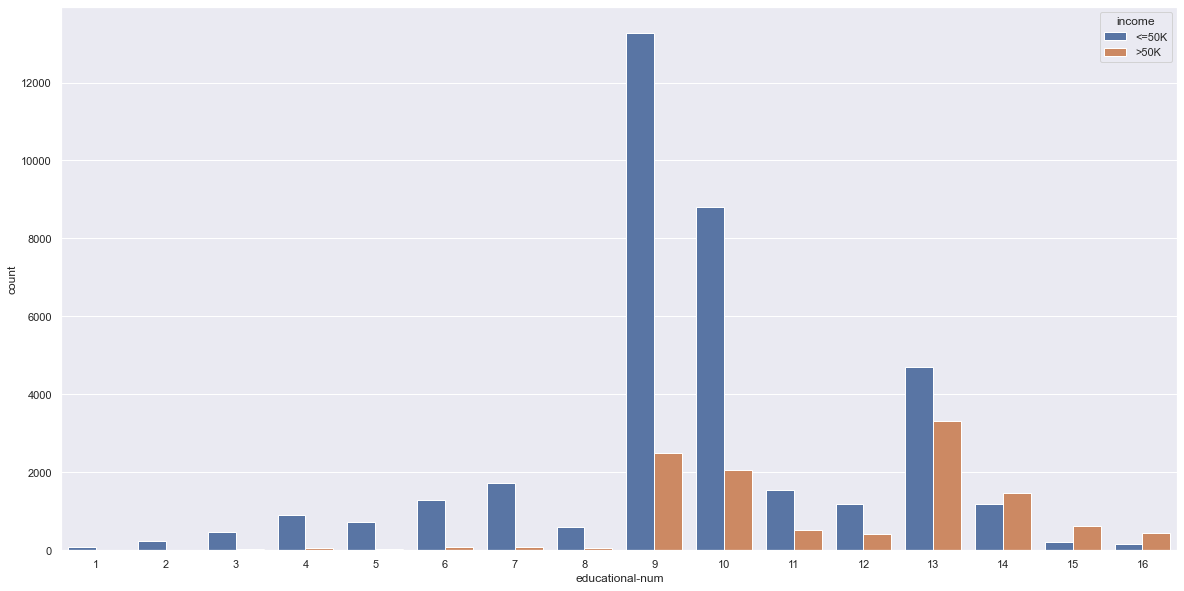

In [353]:
plt.figure(figsize=(20,10))
sns.countplot(df_adult['educational-num'], hue = df_adult['income'])

Podemos analizar que o grau de escolaridade podem afetar sim no valor ganho, pois olhando os últimos valores (14, 15 e 16) temos que a maior quantidade é de pessoas que ganham acima de 50 mil, bem diferente dos valores (1, 2, 3, 4, 5, 6, 7, 8).

In [354]:
del df_adult["education"]

In [355]:
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   educational-num  48842 non-null  int64 
 4   marital-status   48842 non-null  object
 5   occupation       48842 non-null  object
 6   relationship     48842 non-null  object
 7   race             48842 non-null  object
 8   gender           48842 non-null  object
 9   capital-gain     48842 non-null  int64 
 10  capital-loss     48842 non-null  int64 
 11  hours-per-week   48842 non-null  int64 
 12  native-country   48842 non-null  object
 13  income           48842 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


- Aparentemente, não há nenhum dado faltando, mas olhando no dataset, podemos ver alguns elementos que podem atrapalhar a predição. 

- Analisando o tipo de cada feature, percebo que não será necessário transformar algo numérico para objeto. 

In [356]:
df_adult = df_adult.replace('?',np.NaN)
df_adult

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


- Agora podemos ver que existem valores não numéricos no dataset que estavam preenchidos com '?';
- Preciso tratar esses valores faltantes em cada coluna com as seguintes opções: retirar, subtituir pela média, mediana, moda ou zero

In [2]:
def EDA_stats(df):
    df= df.rename(columns=str.lower)

    eda_df = {}
    eda_df['Amount_NaN'] = df.isnull().sum()
    eda_df['%_NaN'] = df.isnull().mean().round(2)
    eda_df['DType'] = df.dtypes
    eda_df['Amount_Data'] = df.count()
    
    colunas = df.columns.str.lower().tolist()
    
    eda_df['Mean'] = np.round(df.mean(), 2)
    eda_df['Median'] = np.round(df.median(), 2)
    
    eda_df['Max'] = df.max()
    eda_df['Min'] = df.min()
    eda_df['STD'] = np.round(df.std(), 2)
    
    eda = pd.DataFrame(eda_df)
    
    eda['Amount_Unique'] = list(map(lambda x: len(df[x].unique().tolist()), colunas))

    return eda

In [3]:
informacao = EDA_stats(df_adult)
informacao

NameError: name 'df_adult' is not defined

Para transformar os `NaN`, precisamos entender a distribuição de nossos dados

<AxesSubplot:>

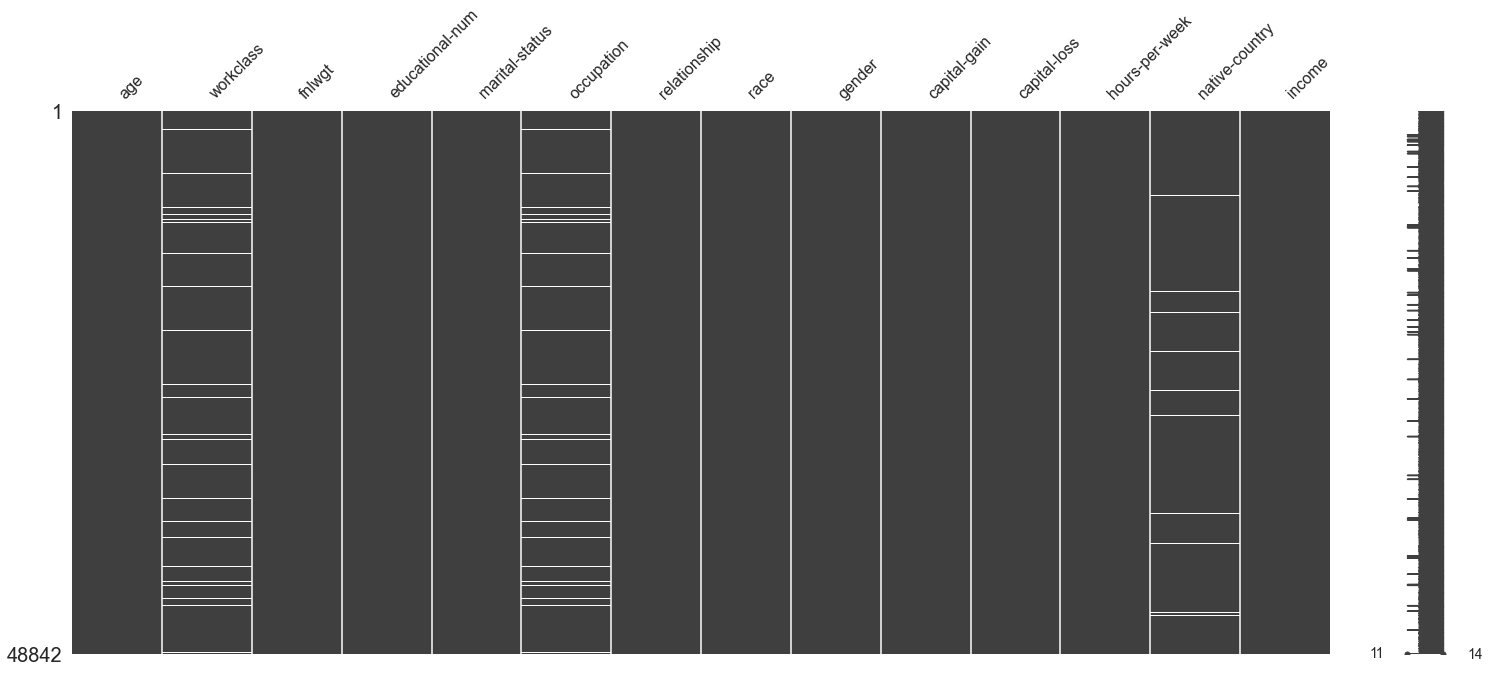

In [359]:
# verificando os dados NaNs
import missingno as msno
msno.matrix(df_adult)

Nesse caso, nenhuma feature numérica possui valores faltantes, somente as categóricas, então não vou conseguir preencher com a média, mediana, moda ou zero.

In [360]:
#Retirando os elementos faltantes do dataset
df_adult_copy = df_adult.dropna(axis=0).copy()

<AxesSubplot:>

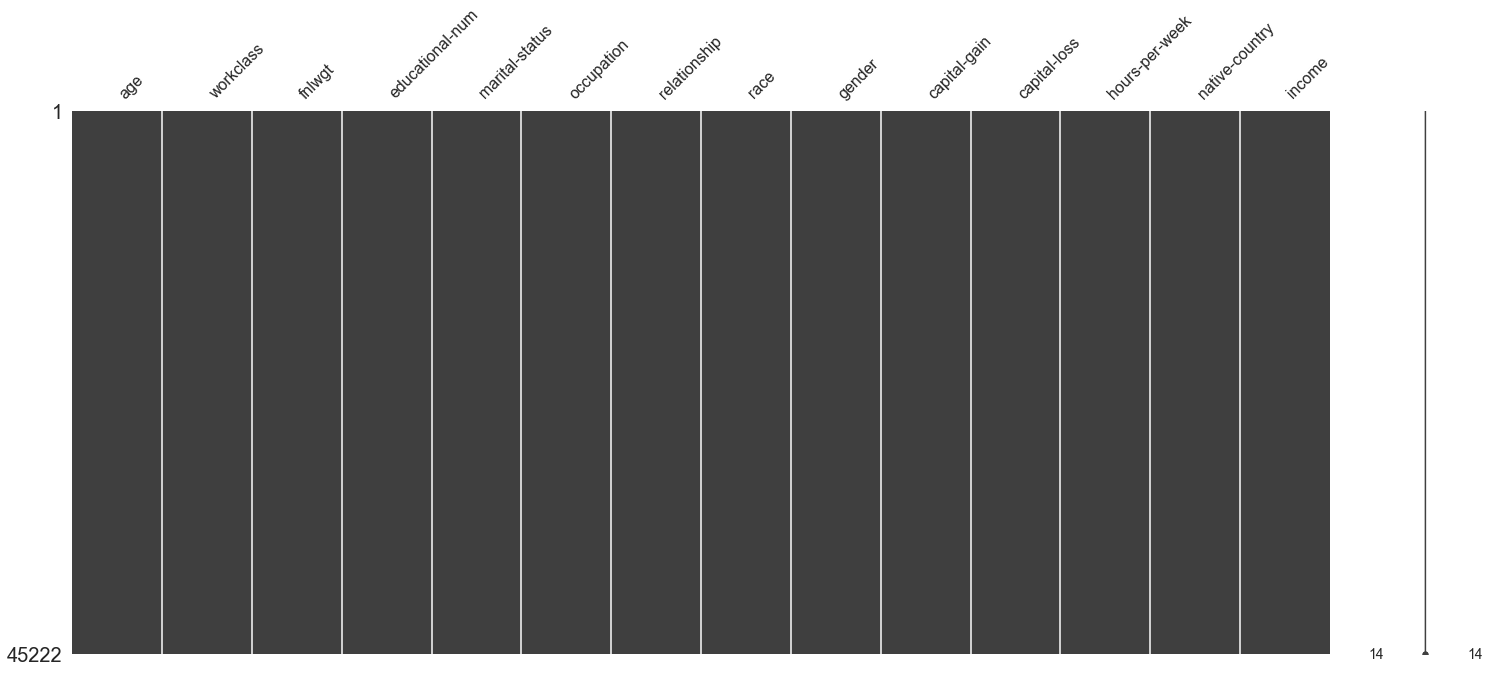

In [361]:
msno.matrix(df_adult_copy)

Uma breve analisada na dispersão dos dados

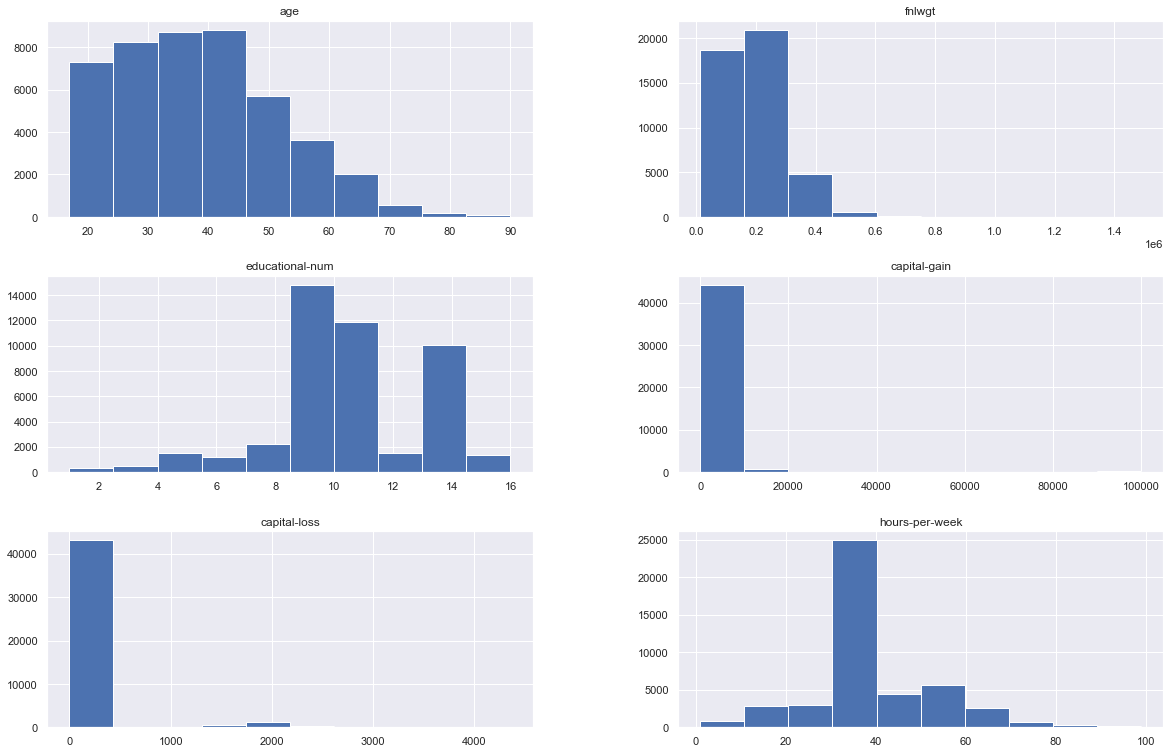

In [362]:
df_adult_copy.hist(figsize=(20,13));

Podemos ver que capital-gain e capital-loss possuem grande quantidade de valores nulos. Além disso, fnlwgt e as duas features citadas anteriormente não estão distribuidas de forma normal, então será necessário tratar essas features para não atrapalhar a predição.

Agora vou tratar das colunas categóricas que posso fazer get_dummies, o frequency_encoder será feito após a separação do treino e teste.

In [363]:
informacao.loc[informacao['DType']=='object']

,Amount_NaN,%_NaN,DType,Amount_Data,Mean,Median,Max,Min,STD,Amount_Unique
gender,0,0.00,object,48842,NaN,NaN,Male,Female,NaN,15
income,0,0.00,object,48842,NaN,NaN,>50K,<=50K,NaN,5
marital-status,0,0.00,object,48842,NaN,NaN,Widowed,Divorced,NaN,2
native-country,857,0.02,object,47985,NaN,NaN,NaN,NaN,NaN,123
occupation,2809,0.06,object,46033,NaN,NaN,NaN,NaN,NaN,99
race,0,0.00,object,48842,NaN,NaN,White,Amer-Indian-Eskimo,NaN,96
relationship,0,0.00,object,48842,NaN,NaN,Wife,Husband,NaN,42
workclass,2799,0.06,object,46043,NaN,NaN,NaN,NaN,NaN,2


- Tenho 9 features categóricas, quais delas vou fazer get_dummies e quais vou fazer frequency encoder? Tem outra opção viável além dessas duas?

    - get_dummies:

        **gender** = 15 elementos

        **marital-status** = 3 elementos
    
        **workclass** = 3 elementos
        
    - Frequency encoder:
    
        **occupation** = 98 elementos

        **race** = 97 elementos

        **relationship** = 42 elementos
    
        **native-country** = 122 elementos


Agora, vou ver como nossa coluna alvo está distribuida, pois se tiver uma diferença muito grande entre valores, a previsão pode não ser boa enviesando futuras previsões de novos dados

In [364]:
# verificando as classes da variável alvo
df_adult_copy.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [365]:
df_adult_copy.income.value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

Como usualmente é feito:

0 - não ocorrência

1 - ocorrência

In [366]:
# trocando valor de '<=50K' para 0 e '>50K' para 1
df_adult_copy['income'] = df_adult_copy['income'].map({'<=50K': 0, '>50K': 1})
df_adult_copy['income']

0        0
1        0
2        1
3        1
5        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 45222, dtype: int64

Como as features 'capital-gain' e 'capital-loss' possuem grande quantidade de zeros, a normalização não ficou tão visível, diferente da 'fnlwgt'.

# 3 - Feature Selection

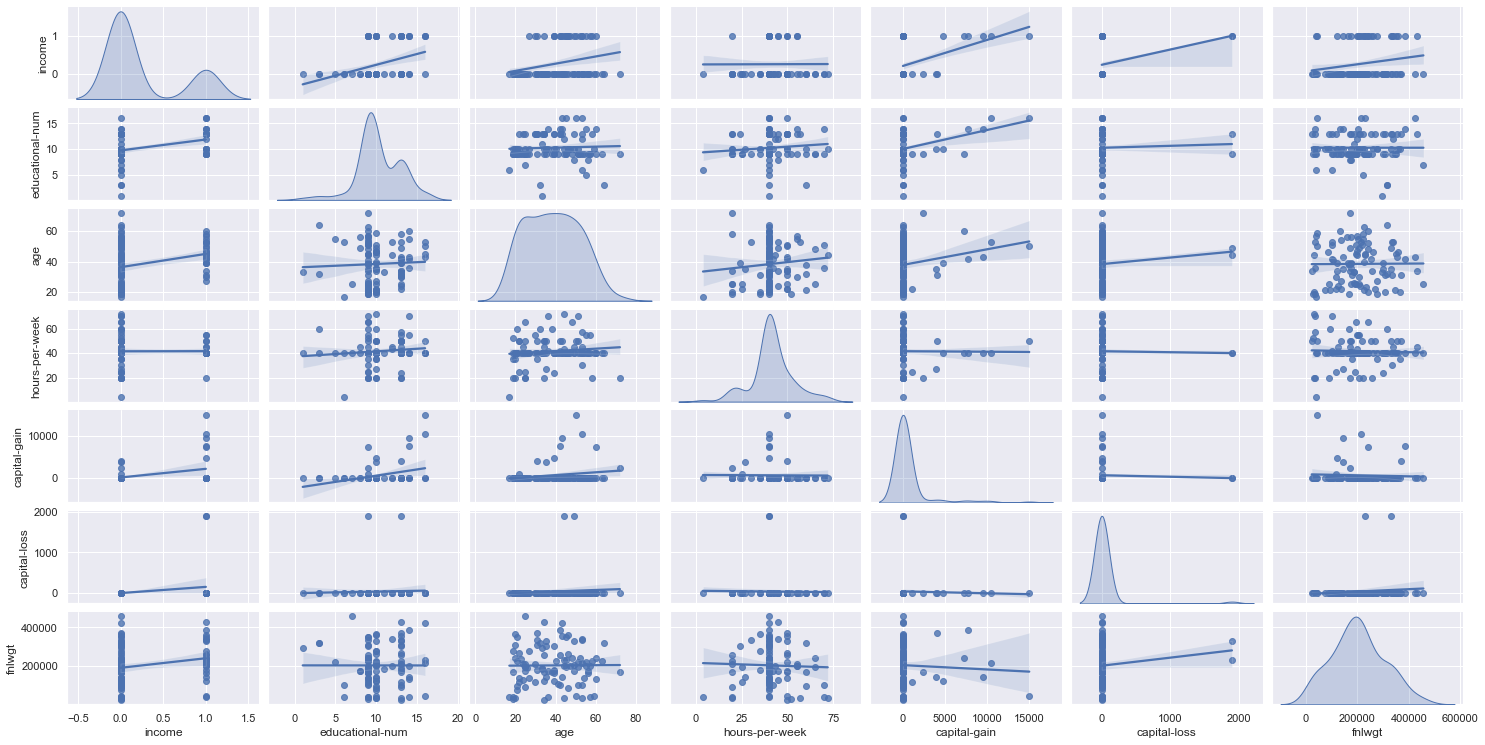

In [367]:
# Utilizaremos o PAIRPLOT para analisar as variáveis mais correlacionadas. 
# Por ser uma amostra, setamos o seed para manter a reproducibilidade do nosso código.
seed = 123
sample_size = 100
df_adult_copy_sample = df_adult_copy[main_features].sample(sample_size, random_state = seed)
sns.pairplot(df_adult_copy_sample, height=1.5, aspect=2, diag_kind='kde', kind='reg')

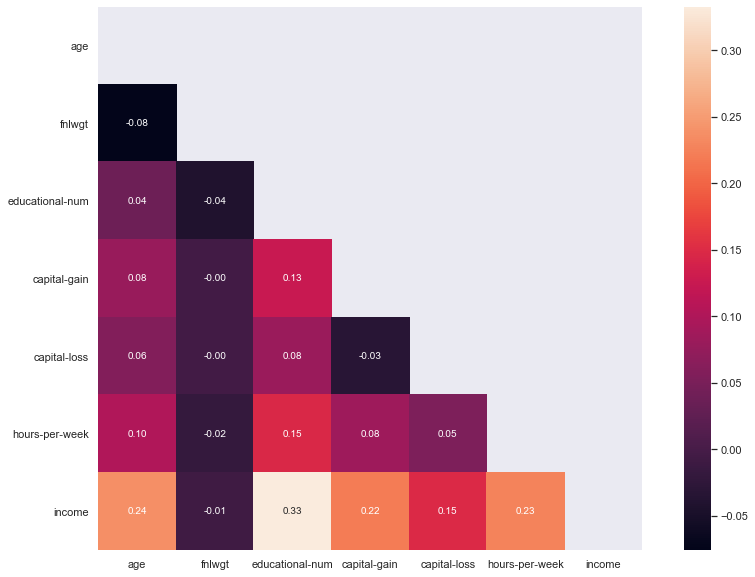

In [368]:
# Plotando um mapa de calor das correlações com todas as variáveis
corrmat = df_adult_copy.corr()
sns.set(font_scale=1.0)
f, ax = plt.subplots(figsize=(15, 10))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrmat, dtype=bool))
hm = sns.heatmap(corrmat, 
                 mask=mask,
                 cbar=True, # formatando a barra lateral de cores para o heatmap
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=corrmat.columns, 
                 xticklabels=corrmat.columns)

O gráfico e a matriz de correlação não ficaram tão boas pois não ficaram visivelmente claras as correlações. Vou criar uma lista com as correlações mais fortes.

In [369]:
corrmat_lower = (corrmat*~mask).replace({0.0:np.nan}).round(2)

corrmat.stack(dropna=True)

# O mapa de calor ajuda nos primeiros insights. Mas e se eu quiser uma lista com as relações mais relevantes?
corr_list = abs(corrmat_lower).stack(dropna=True)\
                              .reset_index()\
                              .rename({'level_0':'var_1','level_1':'var_2',0:'corr'}, axis=1)\
                              .sort_values(by='corr', ascending=False)\
                              .head(20)
corr_list

,var_1,var_2,corr
17,income,educational-num,0.33
15,income,age,0.24
20,income,hours-per-week,0.23
18,income,capital-gain,0.22
12,hours-per-week,educational-num,0.15
19,income,capital-loss,0.15
5,capital-gain,educational-num,0.13
10,hours-per-week,age,0.10
8,capital-loss,educational-num,0.08
13,hours-per-week,capital-gain,0.08


In [370]:
main_features = corr_list[['var_1','var_2']].stack().drop_duplicates().to_list()
print('Qtd de features:',len(main_features))
main_features

Qtd de features: 7


['income',
 'educational-num',
 'age',
 'hours-per-week',
 'capital-gain',
 'capital-loss',
 'fnlwgt']


    "Correlação não implica em causa"



0uando há muitas features, podem atrapalhar o processamento dos dados. Além disso, algumas features podem atrapaçhar na previsão dos dados. Nesses casos, podemos deletar algumas features:

- Correlação acima de 0.95 (significa que há muitos dados iguais em duas features, então podemos tirar uma delas);

- Correlação abaixo de 0.95 significa que há dados diferentes que podem ajudar na predição, então é melhor mantê-las;

Vamos analisar as features que podem ser deletadas e que não afetam nossa predição.

In [371]:
salarios = pd.pivot_table(df_adult, index = ['gender'], values = 'income', aggfunc = "count")
salarios

,income
gender,
Female,16192
Male,32650


C:\Users\beatr\anaconda3\envs\aulas_dh\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='gender', ylabel='count'>

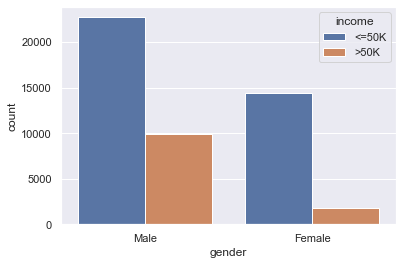

In [372]:
sns.countplot(df_adult['gender'], hue = df_adult['income'])

Podemos ver a divergência entre homens e mulheres, mas devemos considerar que o dataset tem mais entrevistados homens do que mulheres, então talvez não nos ajude da predição. Essa feature pode ser deletada pois trás discussões de ética, assim como a feature a seguir:

In [373]:
salarios = pd.pivot_table(df_adult, index = ['race'], values = 'income', aggfunc = "count")
salarios

,income
race,
Amer-Indian-Eskimo,470
Asian-Pac-Islander,1519
Black,4685
Other,406
White,41762


In [1]:
plt.figure(figsize=(20,10))
sns.countplot(df_adult['race'], hue = df_adult['income'])

NameError: name 'plt' is not defined

Podemos ver a discrepância de salários cima de 50 mil para pessoas que não sejam brancas. Ou seja, as duas features que analisamos: race e gender trazem discussões de ética e podem enviesar nossa previsão. O melhor a fazer é deletar essas colunas.

A escolha de deletar essas colunas foi mais no sentido de ética do que no sentido de ajudar ou não na previsão. Entendo que escolher com quais features vamos trabalhar no modelo é um processo que passa por revisar varias vezes e analisar a importância de cada uma.

In [375]:
df_adult_copy.drop(labels=["gender","race","native-country"], axis = 1, inplace = True)

In [376]:
df_adult_copy

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,0,0,40,0
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,0,0,50,0
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,0,0,40,1
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,7688,0,40,1
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,0,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,0,0,38,0
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,0,0,40,1
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,0,0,40,0
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,0,0,20,0


# 4 - Pre-processing

In [377]:
#aplicando get_dummies:

df_adult_copy = pd.get_dummies(df_adult_copy, columns = ['workclass', 'marital-status', 'relationship'])
df_adult_copy

,age,fnlwgt,educational-num,occupation,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,...,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,226802,7,Machine-op-inspct,0,0,40,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,38,89814,9,Farming-fishing,0,0,50,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,28,336951,12,Protective-serv,0,0,40,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3,44,160323,10,Machine-op-inspct,7688,0,40,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5,34,198693,6,Other-service,0,0,30,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Tech-support,0,0,38,0,0,0,...,0,0,0,0,0,0,0,0,0,1
48838,40,154374,9,Machine-op-inspct,0,0,40,1,0,0,...,0,0,0,0,1,0,0,0,0,0
48839,58,151910,9,Adm-clerical,0,0,40,0,0,0,...,0,0,0,1,0,0,0,0,1,0
48840,22,201490,9,Adm-clerical,0,0,20,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [378]:
# separando minha coluna alvo (variável target)
y = df_adult_copy.income

#Deletando a coluna alvo do dataset
df_adult_copy = df_adult_copy.drop(columns = ["income"])

#separando o conjunto de variáveis independentes
X = df_adult_copy

In [379]:
# separando entre treino e teste mas preciso separar em Gridsearch depois

# separando os dados em treino e teste
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#copiando pois usarei posteriormente nesse formato
X_train_copy = X_train.copy()

In [380]:
print(' X train:', X_train.shape, '\n',
      'X test:', X_test.shape, '\n',
      'y train:', y_train.shape, '\n',
      'y test:', y_test.shape)

 X train: (36177, 27) 
 X test: (9045, 27) 
 y train: (36177,) 
 y test: (9045,)


0    27211
1     8966
Name: income, dtype: int64


C:\Users\beatr\anaconda3\envs\aulas_dh\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


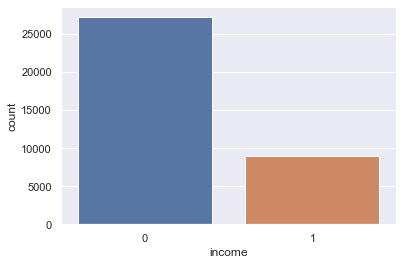

In [381]:
# ver o balanceamento das classes
print(pd.Series(y_train).value_counts())

# plotar a nova distribuição de classes
sns.countplot(y_train);

1    8966
0    8966
Name: income, dtype: int64


C:\Users\beatr\anaconda3\envs\aulas_dh\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


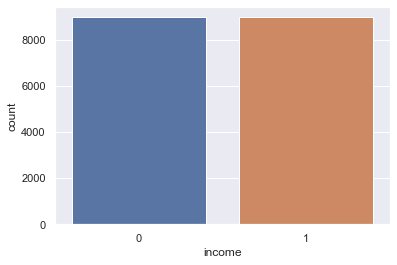

In [382]:
from imblearn.under_sampling import RandomUnderSampler
# usar técnica under-sampling
rus = RandomUnderSampler()
X_train, y_train = rus.fit_sample(X_train, y_train)

# ver o balanceamento das classes
print(pd.Series(y_train).value_counts())

# plotar a nova distribuição de classes
sns.countplot(y_train);

O balaceamento deve ser feito, se necessário, somente no X train e y train.

In [383]:
# sabemos que a saída da divisão entre treino e teste será um array
# vamos reconstruir data frames para fazer uma transformação (de frequencia)

X_test_df = pd.DataFrame(X_test, columns = df_adult_copy.columns.tolist())
X_train_df = pd.DataFrame(X_train, columns = df_adult_copy.columns.tolist())

Tratando as ultimas variáveis categóricas que faltaram

In [384]:
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder

rare_encoder = RareLabelCategoricalEncoder(tol=0.05, n_categories=3)
rare_encoder.fit_transform(X_train_df).value_counts()

# transformar os dados
X_train_df = rare_encoder.transform(X_train_df)
X_test_df = rare_encoder.transform(X_test_df)

In [385]:
from feature_engine import categorical_encoders as ce

encoder = ce.CountFrequencyCategoricalEncoder(encoding_method='frequency',
                         variables=['occupation'])
# 'race', 'relationship', 'native-country'
# treinar o encoder (cria um dicionário)
encoder.fit(X_train_df)

# transformar os dados
train_t = encoder.transform(X_train_df)
test_t = encoder.transform(X_test_df)

Tratando as colunas com distribuições exponenciais para se tornarem normais.

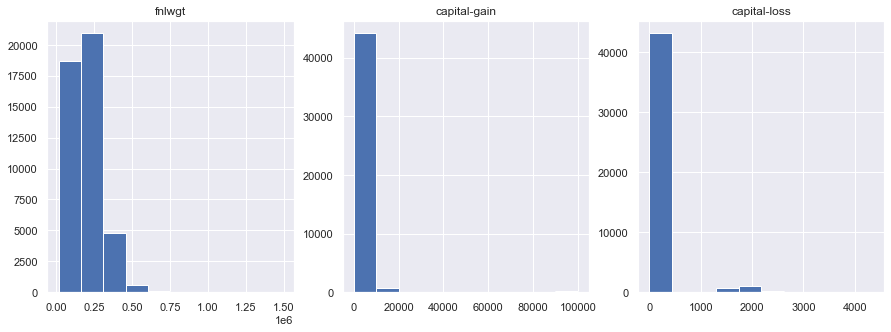

In [386]:
# Define as configurações dos plots
# Cada plot terá o mesmo tamanho de figuras (10,5)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

# Dados para cada subplot
ax1.hist(df_adult_copy['fnlwgt'])
ax2.hist(df_adult_copy['capital-gain'])
ax3.hist(df_adult_copy['capital-loss'])

ax1.set(title = "fnlwgt")
ax2.set(title = "capital-gain")
ax3.set(title = "capital-loss")

plt.show()


In [387]:
# Padronizar os dados
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#definir o scaler
scaler = preprocessing.MinMaxScaler().fit(train_t.values)

#transformar o dado
X_train = scaler.transform(train_t.values)
X_test = scaler.transform(test_t.values)

# 5 - Modelagem
 
 
Escolhi somente 2 modelos para trabalhar LogisticRegression(), DecisionTreeClassifier() e RandomForestClassifier(). A primeira pois tem baixo processamento e a segunda e terceira pois obteve o melhor valor quando testei da primeira vez.

C:\Users\beatr\anaconda3\envs\aulas_dh\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression
****Results****
Accuracy: 0.7945826423438364
Precision: 0.5566371681415929
Recall: 0.8416592328278323

-----Dados de Treino-----
MSE - treino 0.18687262993531117
MAE - treino 0.0
R2 - treino 0.2525094802587553

-----Dados de Teste-----
MSE - test 0.20541735765616362
MAE - test 0.0
R2 - test -0.10183915554912759
Matriz Confusão
 [[5300 1503]
 [ 355 1887]]
DecisionTreeClassifier
****Results****
Accuracy: 0.7657269209508015
Precision: 0.5185185185185185
Recall: 0.768064228367529

-----Dados de Treino-----
MSE - treino 5.5766227972339954e-05
MAE - treino 0.0
R2 - treino 0.9997769350881106

-----Dados de Teste-----
MSE - test 0.23427307904919845
MAE - test 0.0
R2 - test -0.25661849871291786
Matriz Confusão
 [[5204 1599]
 [ 520 1722]]
RandomForestClassifier
****Results****
Accuracy: 0.8131564400221116
Precision: 0.5873417721518988
Recall: 0.8278322925958965

-----Dados de Treino-----
MSE - treino 0.00016729868391701986
MAE - treino 0.0
R2 - treino 0.9993308052643319

-----

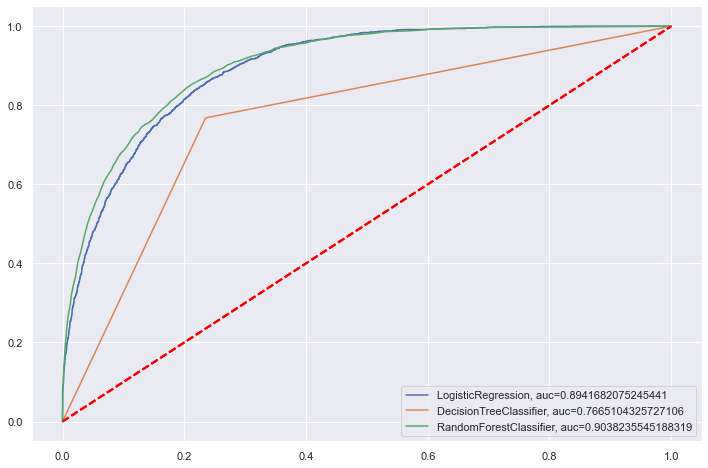

In [388]:
# importnado as bibliotecas com os modelos classificadores
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error


# definindo uma lista com todos os classificadores
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier()]

# definindo o tamanho da figura para o gráfico
plt.figure(figsize=(12,8))

dic_metricas = {'LogisticRegression': [], 'DecisionTreeClassifier': [], 'RandomForestClassifier': []}

# rotina para instanciar, predizer e medir os rasultados de todos os modelos
for clf in classifiers:
    # instanciando o modelo
    clf.fit(X_train, y_train)
    # armazenando o nome do modelo na variável name
    name = clf.__class__.__name__
    # imprimindo o nome do modelo
    print("="*30)
    print(name)
    # imprimindo os resultados do modelo
    print('****Results****')
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    
    accuracy_metric = metrics.accuracy_score(y_test, y_pred_test)
    dic_metricas[name].append(accuracy_metric)
    print("Accuracy:", accuracy_metric)
    
    precision_metric = metrics.precision_score(y_test, y_pred_test)
    dic_metricas[name].append(precision_metric)
    print("Precision:", precision_metric)
    
    recall_metric = metrics.recall_score(y_test, y_pred_test)
    dic_metricas[name].append(recall_metric)
    print("Recall:", recall_metric)
    
    # imprimindo as métricas para os dados de treino
    print('\n-----Dados de Treino-----')
    print('MSE - treino', mean_squared_error(y_train, y_pred_train))
    print('MAE - treino', median_absolute_error(y_train, y_pred_train))
    print('R2 - treino', r2_score(y_train, y_pred_train))
    
    # imprimindo as métricas para os dados de teste
    print('\n-----Dados de Teste-----')
    print('MSE - test', mean_squared_error(y_test, y_pred_test))
    print('MAE - test', median_absolute_error(y_test, y_pred_test))
    print('R2 - test', r2_score(y_test, y_pred_test))
    print('Matriz Confusão\n',metrics.confusion_matrix(y_test, y_pred_test))
    
    # plotando a curva ROC
    y_pred_proba = clf.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label=name+", auc="+str(auc))
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.legend(loc=4)


### Análise dos resultados

Os métodos RandomForestcClassifier e LogisticRegression tiveram melhor desempenho.

In [389]:
df_metricas = pd.DataFrame(dic_metricas, index = ['Accuracy', 'Precision', 'Recall'])
df_metricas

,LogisticRegression,DecisionTreeClassifier,RandomForestClassifier
Accuracy,0.794583,0.765727,0.813156
Precision,0.556637,0.518519,0.587342
Recall,0.841659,0.768064,0.827832


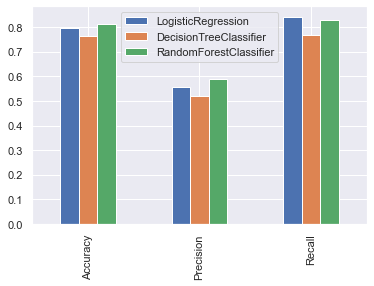

In [390]:
ax = df_metricas.plot.bar()

# 6 - Hiperparâmetros


## Alterando Hiperparametros

 Se utilizarmos outros valores para cada hiperparâmetro, podemos aumentar sua performance. Chamamos isso de fine-tuning.

C:\Users\beatr\anaconda3\envs\aulas_dh\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression
****Results****
Accuracy: 0.7967938087341072
Precision: 0.5598341232227488
Recall: 0.8429973238180196

-----Dados de Treino-----
MSE - treino 0.1860919027436984
MAE - treino 0.0
R2 - treino 0.25563238902520635

-----Dados de Teste-----
MSE - test 0.20320619126589276
MAE - test 0.0
R2 - test -0.08997866948293676
Matriz Confusão
 [[5317 1486]
 [ 352 1890]]
DecisionTreeClassifier
****Results****
Accuracy: 0.7803206191265892
Precision: 0.5362731152204836
Recall: 0.8407671721677074

-----Dados de Treino-----
MSE - treino 0.18642650011153244
MAE - treino 0.0
R2 - treino 0.2542939995538702

-----Dados de Teste-----
MSE - test 0.2196793808734107
MAE - test 0.0
R2 - test -0.17833929067605836
Matriz Confusão
 [[5173 1630]
 [ 357 1885]]
RandomForestClassifier
****Results****
Accuracy: 0.745052515201769
Precision: 0.49204771371769385
Recall: 0.8831400535236396

-----Dados de Treino-----
MSE - treino 0.2067254070934642
MAE - treino 0.0
R2 - treino 0.17309837162614317

-----Dados 

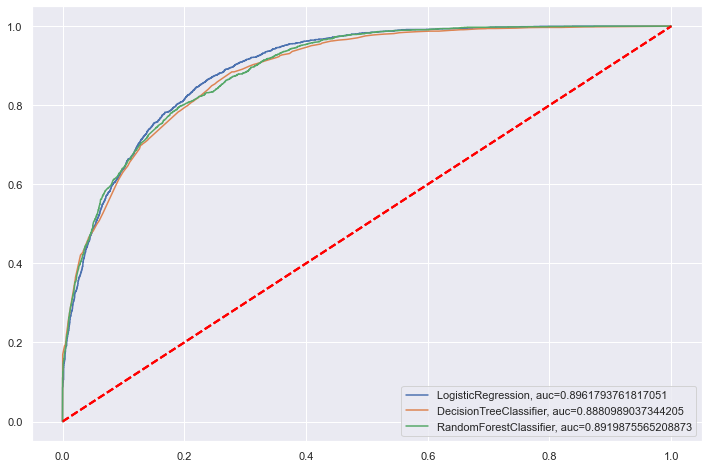

In [391]:
# definindo uma lista com todos os classificadores
classifiers = [
    LogisticRegression(C = 2, penalty = 'l2'),
    DecisionTreeClassifier(criterion = 'entropy', splitter = 'random', max_depth = 13, \
                           min_samples_split = 230, min_impurity_decrease = 0.0),
    RandomForestClassifier(n_estimators = 51, criterion = 'entropy', max_depth = 5),]


# definindo o tamanho da figura para o gráfico
plt.figure(figsize=(12,8))

# rotina para instanciar, predizer e medir os rasultados de todos os modelos
for clf in classifiers:
    # instanciando o modelo
    clf.fit(X_train, y_train)
    # armazenando o nome do modelo na variável name
    name = clf.__class__.__name__
    # imprimindo o nome do modelo
    print("="*30)
    print(name)
    # imprimindo os resultados do modelo
    print('****Results****')
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred_test))
    print("Precision:", metrics.precision_score(y_test, y_pred_test))
    print("Recall:", metrics.recall_score(y_test, y_pred_test))
    
    # imprimindo as métricas para os dados de treino
    print('\n-----Dados de Treino-----')
    print('MSE - treino', mean_squared_error(y_train, y_pred_train))
    print('MAE - treino', median_absolute_error(y_train, y_pred_train))
    print('R2 - treino', r2_score(y_train, y_pred_train))
    
    # imprimindo as métricas para os dados de teste
    print('\n-----Dados de Teste-----')
    print('MSE - test', mean_squared_error(y_test, y_pred_test))
    print('MAE - test', median_absolute_error(y_test, y_pred_test))
    print('R2 - test', r2_score(y_test, y_pred_test))
    print('Matriz Confusão\n',metrics.confusion_matrix(y_test, y_pred_test))
    
    # plotando a curva ROC
    y_pred_proba = clf.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label=name+", auc="+str(auc))
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.legend(loc=4)

Testando parâmetro por parâmetro não está sendo eficiente pois demora muito para rodar e descobrir os melhores parâmetros para cada modelo, mas já consegui ter uma noção da mudança de AUC quando alteramos os parâmetros de cada função. Vou usar a ferramenta Grid Search para encontrar de form mais rápida.

# 7 -  GridSearch e Cross Validation

# GridSearch e Cross Validation - LogisticRegression

In [392]:
%%time
####################### LogisticRegression #################################

# importando GridSearchCV
from sklearn.model_selection import GridSearchCV

# criando uma lista com o Grid Searrch dos parâmetros
parameters = {
    'penalty' : ('l2','elasticnet','none'),
    'C': range(1,3,1)
    }

# instanciando o modelo
clf_logistic = LogisticRegression()

# parametrizando o modelo
clf=GridSearchCV(clf_logistic,parameters,verbose=1, cv = 10)


# ajustando o modelo
clf.fit(X_train, y_train)

# imprimindo os melhores parâmetros
print("Best Parameters LogisticRegression: " + str(clf.best_params_))
# imprimindo os melhores scores
print("Best Score LogisticRegression: " + str(clf.best_score_ ))
# imprimindo os resultados
print('****Results****')
# fazendo predições
y_pred = clf.predict(X_test)
# calculando e imprimindo as métricas
print("Accuracy LogisticRegression:", metrics.accuracy_score(y_test, y_pred))
print("Precision LogisticRegression:", metrics.precision_score(y_test, y_pred))
print("Recall LogisticRegression:", metrics.recall_score(y_test, y_pred))

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\beatr\anaconda3\envs\aulas_dh\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\beatr\anaconda3\envs\aulas_dh\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentati

C:\Users\beatr\anaconda3\envs\aulas_dh\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\beatr\anaconda3\envs\aulas_dh\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

C:\Users\beatr\anaconda3\envs\aulas_dh\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\beatr\anaconda3\envs\aulas_dh\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\beatr\anaconda3\envs\aulas_dh\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of

Best Parameters LogisticRegression: {'C': 2, 'penalty': 'l2'}
Best Score LogisticRegression: 0.8139092880090478
****Results****
Accuracy LogisticRegression: 0.7967938087341072
Precision LogisticRegression: 0.5598341232227488
Recall LogisticRegression: 0.8429973238180196
Wall time: 9 s


C:\Users\beatr\anaconda3\envs\aulas_dh\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# GridSearch e Cross Validation - DecisionTreeClassifier

In [340]:
%%time
####################### DecisionTreeClassifier #################################

# importando GridSearchCV
from sklearn.model_selection import GridSearchCV

# criando uma lista com o Grid Searrch dos parâmetros
parameters = {
    'criterion': ('gini','entropy'),
    'max_depth': range(1,20,2),
    'min_samples_split': range(10,500,20),
    'min_impurity_decrease': [0.0, 0.05, 0.1]
    }

# instanciando o modelo
clf_tree = DecisionTreeClassifier()

# parametrizando o modelo
clf=GridSearchCV(clf_tree,parameters,verbose=1, cv = 10)


# ajustando o modelo
clf.fit(X_train, y_train)

# imprimindo os melhores parâmetros
print("Best Parameters DecisionTree: " + str(clf.best_params_))
# imprimindo os resultados
print('****Results****')
# fazendo predições
y_pred = clf.predict(X_test)
# calculando e imprimindo as métricas
print("Accuracy DecisionTree:", metrics.accuracy_score(y_test, y_pred))
print("Precision DecisionTree:", metrics.precision_score(y_test, y_pred))
print("Recall DecisionTree:", metrics.recall_score(y_test, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 1500 candidates, totalling 15000 fits
Best Parameters DecisionTree: {'criterion': 'gini', 'max_depth': 9, 'min_impurity_decrease': 0.0, 'min_samples_split': 390}
****Results****
Accuracy DecisionTree: 0.7914870093974572
Precision DecisionTree: 0.5506545247581104
Recall DecisionTree: 0.8630686886708296
Wall time: 6min 6s


[Parallel(n_jobs=1)]: Done 15000 out of 15000 | elapsed:  6.1min finished


# GridSearch e Cross Validation - RandomForestClassifier

In [341]:
%%time
####################### RandomForestClassifier #################################

# importando GridSearchCV
from sklearn.model_selection import GridSearchCV

# criando uma lista com o Grid Searrch dos parâmetros
parameters = {
    'n_estimators' : range(1,200,50),
    'criterion' : ('gini','entropy'),
    'max_depth' : range(5,15,5)
    }

# instanciando o modelo
clf_forest = RandomForestClassifier()

# parametrizando o modelo
clf=GridSearchCV(clf_forest,parameters,verbose=1, cv = 10)


# ajustando o modelo
clf.fit(X_train, y_train)

# imprimindo os melhores parâmetros
print("Best Parameters RandomForest: " + str(clf.best_params_))
# imprimindo os resultados
print('****Results****')
# fazendo predições
y_pred = clf.predict(X_test)
# calculando e imprimindo as métricas
print("Accuracy RandomForest:", metrics.accuracy_score(y_test, y_pred))
print("Precision RandomForest:", metrics.precision_score(y_test, y_pred))
print("Recall RandomForest:", metrics.recall_score(y_test, y_pred))

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  1.4min finished


Best Parameters RandomForest: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 101}
****Results****
Accuracy RandomForest: 0.7932559425096739
Precision RandomForest: 0.5516953863257366
Recall RandomForest: 0.8853702051739518
Wall time: 1min 27s


Agora que achei cada parâmetro de cada modelo que otimiza minha predição, vou colocar na função e comparar os resultados.

C:\Users\beatr\anaconda3\envs\aulas_dh\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression
****Results****
Accuracy: 0.7984521835268104
Precision: 0.562743336328242
Recall: 0.8380909901873327

-----Dados de Treino-----
MSE - treino 0.18514387686816863
MAE - treino 0.0
R2 - treino 0.25942449252732547

-----Dados de Teste-----
MSE - test 0.20154781647318962
MAE - test 0.0
R2 - test -0.08108330493329352
Matriz Confusão
 [[5343 1460]
 [ 363 1879]]
DecisionTreeClassifier
****Results****
Accuracy: 0.7820895522388059
Precision: 0.5390827805018749
Recall: 0.8336306868867083

-----Dados de Treino-----
MSE - treino 0.19412223957171537
MAE - treino 0.0
R2 - treino 0.22351104171313851

-----Dados de Teste-----
MSE - test 0.21791044776119403
MAE - test 0.0
R2 - test -0.1688509018231057
Matriz Confusão
 [[5205 1598]
 [ 373 1869]]
RandomForestClassifier
****Results****
Accuracy: 0.7963515754560531
Precision: 0.5560224089635855
Recall: 0.8853702051739518

-----Dados de Treino-----
MSE - treino 0.15547624358688378
MAE - treino 0.0
R2 - treino 0.3780950256524649

-----Dados

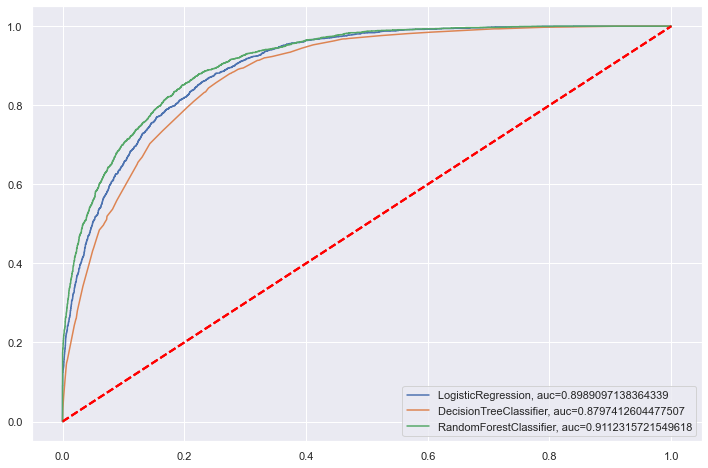

In [406]:
# definindo uma lista com todos os classificadores
classifiers = [
    LogisticRegression(C = 1, penalty = 'none'),
    DecisionTreeClassifier(criterion = 'gini', splitter = 'random', max_depth = 9, \
                           min_samples_split = 390, min_impurity_decrease = 0.0),
    RandomForestClassifier(n_estimators = 101, criterion = 'gini', max_depth = 10)
    ]


# definindo o tamanho da figura para o gráfico
plt.figure(figsize=(12,8))

dic_metricas = {'LogisticRegression': [], 'DecisionTreeClassifier': [], 'RandomForestClassifier': []}

# rotina para instanciar, predizer e medir os rasultados de todos os modelos
for clf in classifiers:
    # instanciando o modelo
    clf.fit(X_train, y_train)
    # armazenando o nome do modelo na variável name
    name = clf.__class__.__name__
    # imprimindo o nome do modelo
    print("="*30)
    print(name)
    # imprimindo os resultados do modelo
    print('****Results****')
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    
    accuracy_metric = metrics.accuracy_score(y_test, y_pred_test)
    dic_metricas[name].append(accuracy_metric)
    print("Accuracy:", accuracy_metric)
    
    precision_metric = metrics.precision_score(y_test, y_pred_test)
    dic_metricas[name].append(precision_metric)
    print("Precision:", precision_metric)
    
    recall_metric = metrics.recall_score(y_test, y_pred_test)
    dic_metricas[name].append(recall_metric)
    print("Recall:", recall_metric)
    
    # imprimindo as métricas para os dados de treino
    print('\n-----Dados de Treino-----')
    print('MSE - treino', mean_squared_error(y_train, y_pred_train))
    print('MAE - treino', median_absolute_error(y_train, y_pred_train))
    print('R2 - treino', r2_score(y_train, y_pred_train))
    
    # imprimindo as métricas para os dados de teste
    print('\n-----Dados de Teste-----')
    print('MSE - test', mean_squared_error(y_test, y_pred_test))
    print('MAE - test', median_absolute_error(y_test, y_pred_test))
    print('R2 - test', r2_score(y_test, y_pred_test))
    print('Matriz Confusão\n',metrics.confusion_matrix(y_test, y_pred_test))
    
    # plotando a curva ROC
    y_pred_proba = clf.predict_proba(X_test)[::,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label=name+", auc="+str(auc))
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.legend(loc=4)


### Análise dos resultados

In [407]:
thresholds

array([1.99004868, 0.99004868, 0.97810726, ..., 0.00306454, 0.00300891,
       0.00298879])

In [394]:
df_metricas = pd.DataFrame(dic_metricas, index = ['Accuracy', 'Precision', 'Recall'])
df_metricas

,LogisticRegression,DecisionTreeClassifier,RandomForestClassifier
Accuracy,0.798452,0.767717,0.793809
Precision,0.562743,0.518916,0.552376
Recall,0.838091,0.862623,0.886708


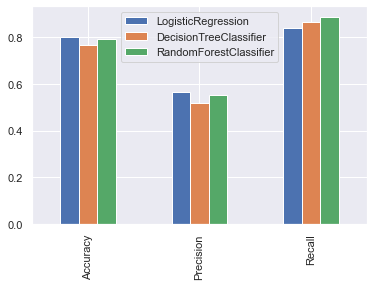

In [395]:
ax = df_metricas.plot.bar()

# 8 - Aprofundamento da validação do modelo RandomForestClassifier usando KFold

In [396]:
from sklearn.model_selection import cross_val_score

def run_cv(X_train, y_train, k):
    model = RandomForestClassifier(n_estimators = 151, criterion = 'gini', max_depth = 10)
    
    score = cross_val_score(estimator=model,\
                            X=X_train,\
                            y=y_train,\
                            scoring='neg_mean_absolute_error',\
                            cv=k)
    return score*-1

In [397]:
#dividindo em 20 subconjuntos:
score20 = run_cv(X_train, y_train, 20)
print('mean', score20.mean())
print('std', score20.std())

mean 0.17560705824972125
std 0.009944406390090381


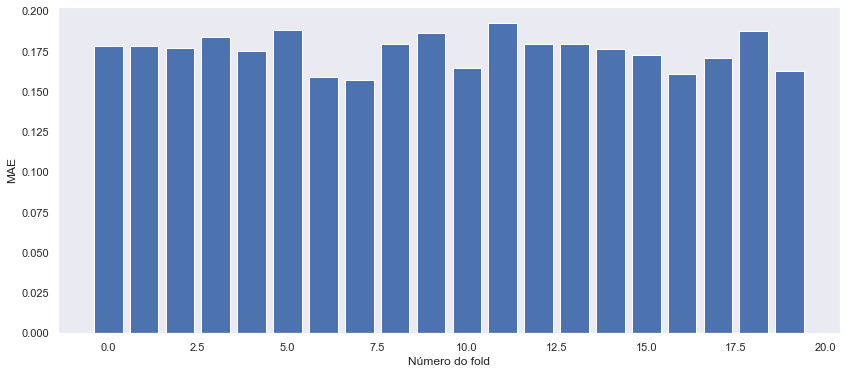

In [398]:
fig = plt.figure(figsize=(14,6))
plt.bar(range(len(score20)), score20)
plt.grid()
plt.xlabel('Número do fold')
plt.ylabel('MAE');

In [399]:
#dividindo em 10 subconjuntos:
score10 = run_cv(X_train, y_train, 10)
print('mean', score20.mean())
print('std', score20.std())

mean 0.17560705824972125
std 0.009944406390090381


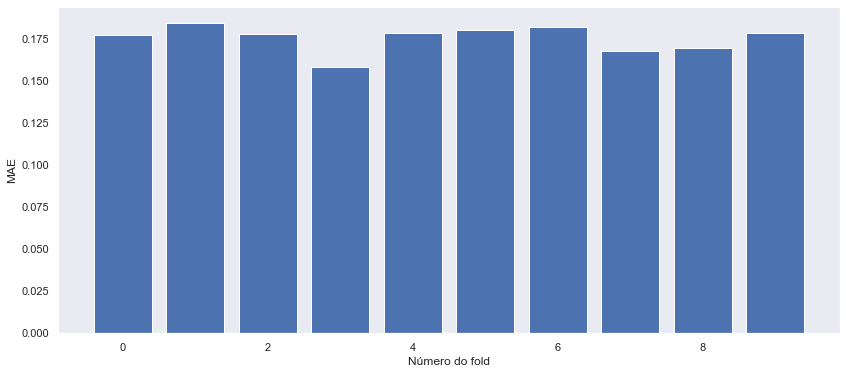

In [400]:
fig = plt.figure(figsize=(14,6))
plt.bar(range(len(score10)), score10)
plt.grid()
plt.xlabel('Número do fold')
plt.ylabel('MAE');

In [401]:
#dividindo em 5 subconjuntos:
score5 = run_cv(X_train, y_train, 5)
print('mean', score20.mean())
print('std', score20.std())

mean 0.17560705824972125
std 0.009944406390090381


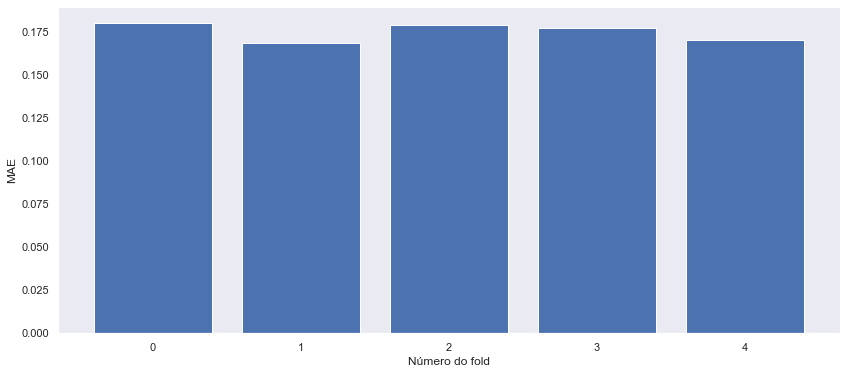

In [402]:
fig = plt.figure(figsize=(14,6))
plt.bar(range(len(score5)), score5)
plt.grid()
plt.xlabel('Número do fold')
plt.ylabel('MAE');

In [403]:
#dividindo em 2 subconjuntos:
score2 = run_cv(X_train, y_train, 2)
print('mean', score20.mean())
print('std', score20.std())

mean 0.17560705824972125
std 0.009944406390090381


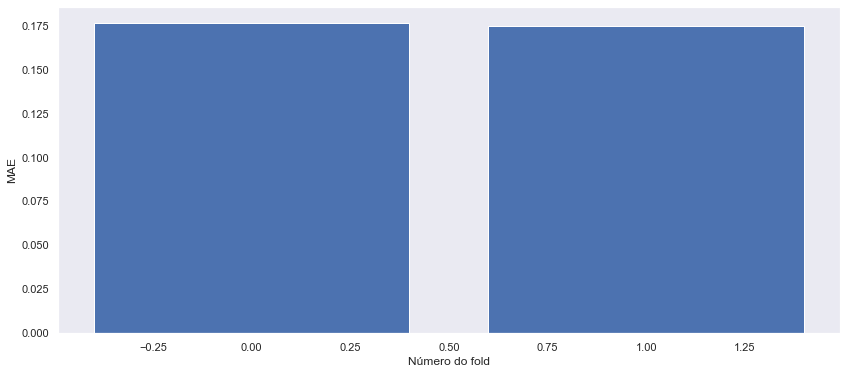

In [404]:
fig = plt.figure(figsize=(14,6))
plt.bar(range(len(score2)), score2)
plt.grid()
plt.xlabel('Número do fold')
plt.ylabel('MAE');

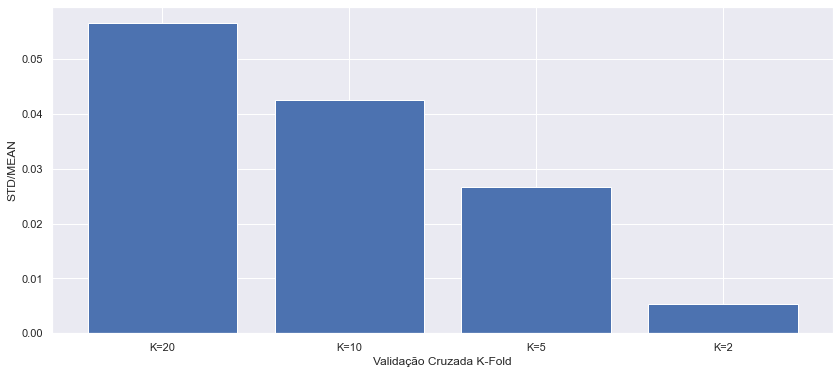

In [405]:
fig = plt.figure(figsize=(14,6))
plt.bar(range(4), [score20.std()/score20.mean(),
                   score10.std()/score10.mean(),
                   score5.std()/score5.mean(),
                   score2.std()/score2.mean()]);
plt.xticks(range(4), ('K=20', 'K=10', 'K=5', 'K=2'))
plt.xlabel('Validação Cruzada K-Fold')
plt.ylabel('STD/MEAN');

# Conclusão

Olhando o quanto a métrica varia, podemos verificar que é um bom modelo, pois é uma variação bem baixa e o modelo escolhido é bem estável.

Não sei se ROC = 0.90 é o melhor, seria interessante investigar para aumentar esse valor.

Vi que a escolha de fazer o balaceamento alterou significamente na performace.




Quais aplicações de negócio podem ser desenvolvidas com o estudo?

A previsão de encontrar se um adulto recebe bem ou não pode ajudar a entender o poder de compra dessas pessoas e a qualidade de vida que elas possuem. Acredito que possa ajudar na escolha de anuncios oferecidos para essas pessoas sejam uma boa aplicação.

